# CAR DATA

Project to practice about EDA, Univariate and bivariate, clean data, and Lineal Regression

## About Dataset
There is an automobile company XYZ from India which aspires to enter the Indian used-car market by setting up their company locally to give competition to their counterparts.

Data Dictionary:
<br>Description
<br>**Sales_ID**: Sales ID
<br>**name**: Name of the brand of the used car
<br>**year**: Year of the car purchase
<br>**selling_price**: Current sellling price for used car
<br>**km_driven**: Total km driven
<br>**Region**: Region where it is used
<br>**State** or Province: State or Province where it is used
<br>**City**: City where it is used
<br>**fuel**: Fuel type
<br>**seller_type**: Who is selling the car
<br>**transmission**: Transmission type of the car
<br>**owner**: Owner type
<br>**mileage**: Mileage of the car
<br>**engine**: engine power
<br>**max_power**: max power
<br>**seats**: Number of seats
<br>**sold**: used car sold or not


Link
https://www.kaggle.com/datasets/shubham1kumar/usedcar-data?datasetId=2264727&sortBy=voteCount&select=UserCarData.csv

In [40]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk


Importing dataset from local file

In [41]:
df = pd.read_csv("UserCarData.csv")

In [42]:
df.head()

,Sales_ID,name,year,selling_price,km_driven,Region,State or Province,City,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,1,Maruti,2014,450000,145500,East,District of Columbia,Washington,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,2,Skoda,2014,370000,120000,East,New York,New York City,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,3,Honda,2006,158000,140000,Central,Illinois,Chicago,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,4,Hyundai,2010,225000,127000,Central,Illinois,Chicago,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,5,Maruti,2007,130000,120000,East,New York,New York City,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


# EDA

In [43]:
df.shape

(7906, 18)

The file has 7906 registers and 18 variables

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Sales_ID           7906 non-null   int64  
 1   name               7906 non-null   object 
 2   year               7906 non-null   int64  
 3   selling_price      7906 non-null   int64  
 4   km_driven          7906 non-null   int64  
 5   Region             7906 non-null   object 
 6   State or Province  7906 non-null   object 
 7   City               7906 non-null   object 
 8   fuel               7906 non-null   object 
 9   seller_type        7906 non-null   object 
 10  transmission       7906 non-null   object 
 11  owner              7906 non-null   object 
 12  mileage            7906 non-null   float64
 13  engine             7906 non-null   int64  
 14  max_power          7906 non-null   float64
 15  torque             7906 non-null   object 
 16  seats              7906 

The dataset doesn't has any null values.

Cuantitative columns:

Sales_ID, year, selling_price, km_drive, mileage, engine, seats.

Cualitative columns:

name, Region, Sate or Province, City, fuel, seller_type, transmission, owner, torque, sold

### General description of the dataset 
We can see the different values in the dataset for each column after execute `describe()`, such as the mean, min and max values.


In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales_ID,7906.0,4070.106248,2345.770159,1.0,2037.25,4076.5,6102.00,8128.0
year,7906.0,2013.983936,3.863695,1994.0,2012.00,2015.0,2017.00,2020.0
selling_price,7906.0,649813.720845,813582.748354,29999.0,270000.00,450000.0,690000.00,10000000.0
km_driven,7906.0,69188.659752,56792.296343,1.0,35000.00,60000.0,95425.00,2360457.0
mileage,7906.0,19.419861,4.036263,0.0,16.78,19.3,22.32,42.0
engine,7906.0,1458.708829,503.893057,624.0,1197.00,1248.0,1582.00,3604.0
max_power,7906.0,91.587374,35.747216,32.8,68.05,82.0,102.00,400.0
seats,7906.0,5.416393,0.959208,2.0,5.00,5.0,5.00,14.0


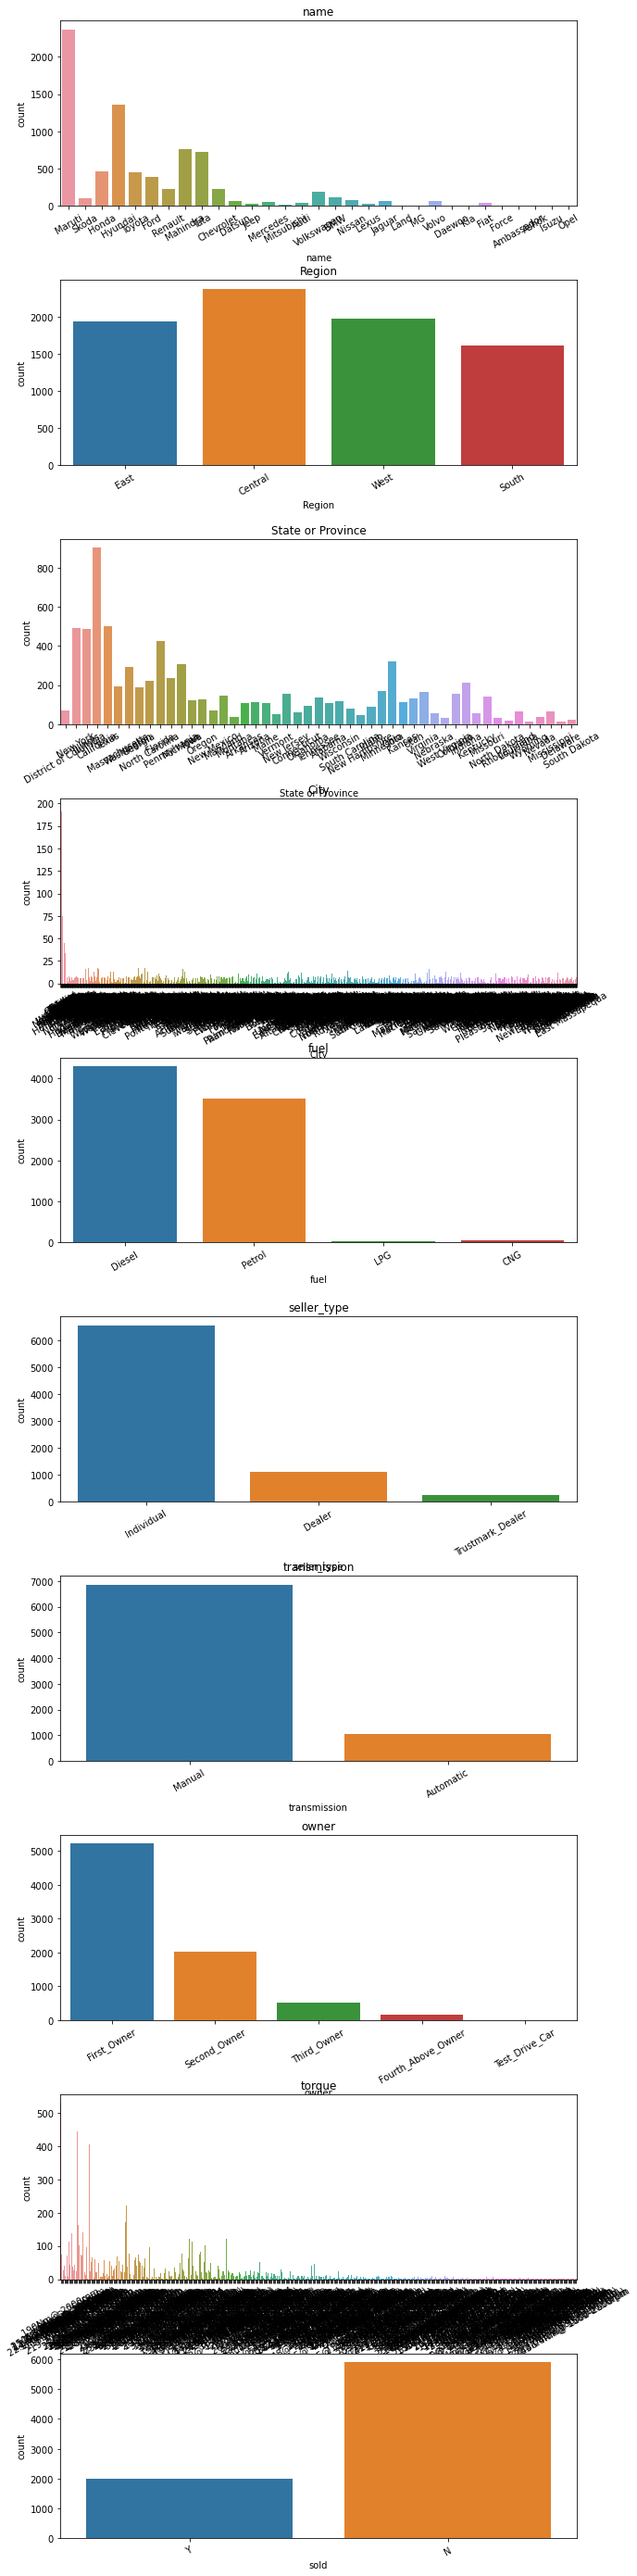

In [46]:
col_object = ['name', 'Region', 'State or Province', 'City', 'fuel', 'seller_type', 'transmission', 'owner', 'torque', 'sold']

fig , ax = plt.subplots(nrows=len(col_object), ncols=1, figsize=(10,50))

fig.subplots_adjust(hspace=0.4)

for i, col in enumerate(col_object):
  sns.countplot(x=col, data=df, ax=ax[i])
  ax[i].set_title(col)
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=30)


In [47]:
#col_object = ['name', 'Region', 'State or Province', 'City', 'fuel', 'seller_type', 'transmission', 'owner', 'torque', 'sold']
print("Unique Values: ")
for element in col_object:
    valores_unicos = pd.unique(df[element])
    print(f"{element}: count {len(valores_unicos)}, {valores_unicos}")


Unique Values: 
name: count 31, ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Datsun' 'Jeep' 'Mercedes' 'Mitsubishi' 'Audi'
 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo' 'Daewoo'
 'Kia' 'Fiat' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel']
Region: count 4, ['East' 'Central' 'West' 'South']
State or Province: count 49, ['District of Columbia' 'New York' 'Illinois' 'California' 'Texas'
 'Massachusetts' 'Washington' 'Georgia' 'North Carolina' 'Florida'
 'Pennsylvania' 'Michigan' 'Iowa' 'Oregon' 'New Mexico' 'Maryland'
 'Montana' 'Arkansas' 'Arizona' 'Maine' 'Vermont' 'New Jersey'
 'Connecticut' 'Oklahoma' 'Tennessee' 'Alabama' 'Wisconsin'
 'South Carolina' 'New Hampshire' 'Idaho' 'Minnesota' 'Ohio' 'Kansas'
 'Utah' 'Virginia' 'Nebraska' 'West Virginia' 'Colorado' 'Indiana'
 'Kentucky' 'Missouri' 'North Dakota' 'Rhode Island' 'Louisiana' 'Wyoming'
 'Nevada' 'Mississippi' 'Delaware' 'South Dakota']
City: count 1310, ['Washing

In two columns there are a lot of unique values like 'City' with 1310 and 'torque' with 441 values.  from the 'torque' variable we can split the values, this will we for the future process. 
The 'City' and 'State' columns may add some information but at this time and for learning purpose we will skip.

array([[<AxesSubplot:title={'center':'Sales_ID'}>,
        <AxesSubplot:title={'center':'year'}>,
        <AxesSubplot:title={'center':'selling_price'}>],
       [<AxesSubplot:title={'center':'km_driven'}>,
        <AxesSubplot:title={'center':'mileage'}>,
        <AxesSubplot:title={'center':'engine'}>],
       [<AxesSubplot:title={'center':'max_power'}>,
        <AxesSubplot:title={'center':'seats'}>, <AxesSubplot:>]],
      dtype=object)

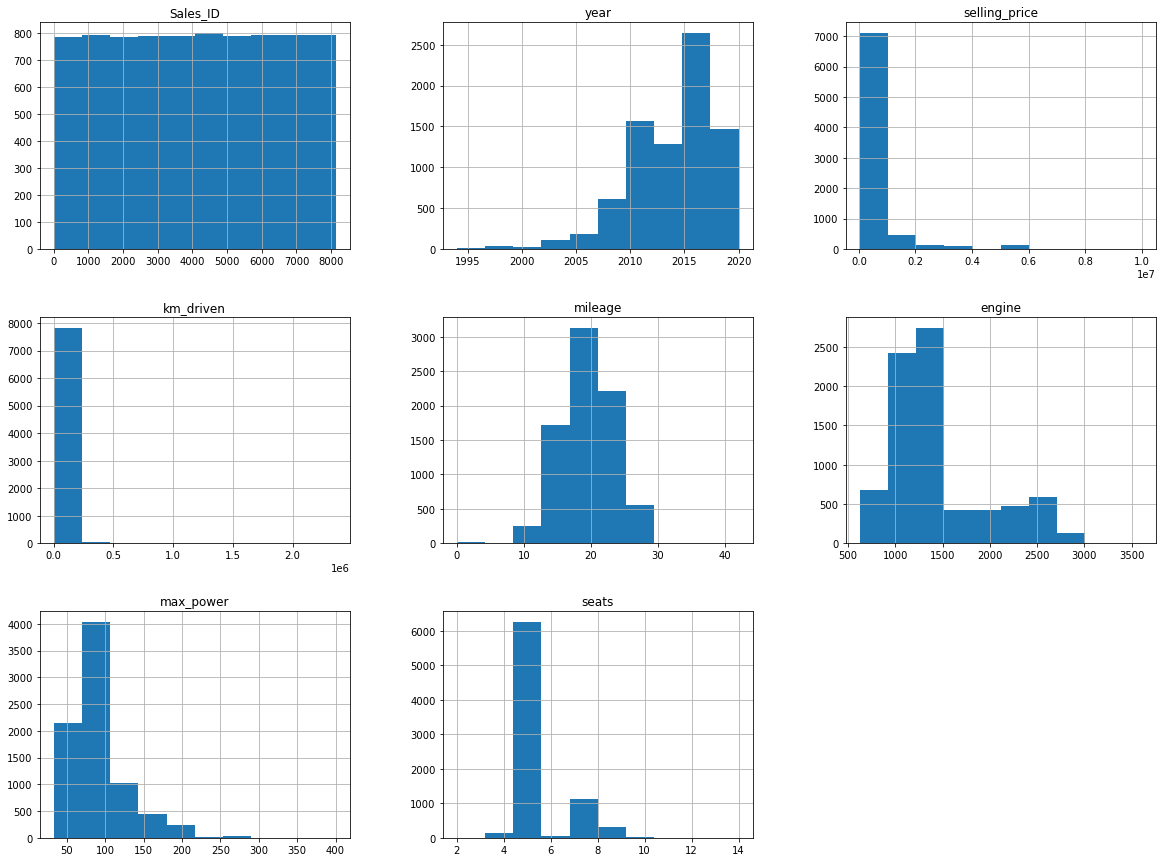

In [48]:
# year, selling_price, km_driven, mileage, engine, seats
df.hist(bins=10, figsize=(20,15))

From this graph we can see the cuantities for each numeric column. 
The column 'Sales_ID' must be ingnored due to the relation in the database record, it doesn't add information from the car.

Year: Most the the values are increasing after 2010

selling_price: this graph has another relation in x, refers to 1e7, this means we have to multiply the value in x for 10000000. It contains high values.

km_drive: In this chart we also have to multiply the value in x to obtain the real value, in this case for 1e6

mileage: the values of this graph can be similar to a normal graph, the central value it's 20. 

engine: most of the values are up to 1500.

max_power, most of the cars has between 50 until 100.

seats: there are lot of cars between 5 seats.



## Clean dataset

Drop some columns due to the analisys.

In [49]:
df_1 = df.drop(columns=['Sales_ID', 'State or Province', 'City'], axis=1)

In [50]:
# nuevo df
df_1.head()

,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold
0,Maruti,2014,450000,145500,East,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y
1,Skoda,2014,370000,120000,East,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y
2,Honda,2006,158000,140000,Central,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y
3,Hyundai,2010,225000,127000,Central,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y
4,Maruti,2007,130000,120000,East,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y


In [94]:
# torque values
# 190Nm@ 2000rpm
# 250Nm@ 1500-2500rpm
# 11.5@ 4,500(kgm@ rpm)
# 22.4 kgm at 1750-2750rpm
df_aux = df_1.copy()

df_aux
df_aux[['First','Last']] = df_aux.torque.str.split("at", 1,expand=True)
df_aux[['First','Last']] = df_aux.torque.str.split("@", 1,expand=True)

#for element in list(df_aux):
#    aux = element.split('@')
#    df_aux['RPM']
#df['RPM'] = 
df_aux.head()

,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,First,Last
3641,Maruti,2014,501000,68000,West,Diesel,Dealer,Manual,First_Owner,22.90,1248,74.0,190Nm@ 2000rpm,5,N,190Nm,2000rpm
5531,Maruti,2015,440000,110000,South,Diesel,Individual,Manual,First_Owner,26.59,1248,74.0,190Nm@ 2000rpm,5,N,190Nm,2000rpm
3524,Tata,2012,140000,185000,West,Diesel,Individual,Manual,Second_Owner,19.40,1405,70.0,135.4Nm@ 2500rpm,5,N,135.4Nm,2500rpm
7478,Toyota,2012,476999,90000,Central,Diesel,Individual,Manual,Fourth_Above_Owner,21.43,1364,87.2,205Nm@ 1800-2800rpm,5,N,205Nm,1800-2800rpm
3455,Maruti,2018,620000,15000,Central,Petrol,Individual,Automatic,First_Owner,20.89,1197,81.8,113Nm@ 4200rpm,5,N,113Nm,4200rpm


In [126]:
import pandas as pd
df_aux = df_1.sample(n=500, random_state = 42)
def get_first_value_split(element, match):
    first_value = None
    if match in element:
        first_value = float(element.split(match)[0])
    return first_value

def fun(row):
    npm_list = []
    nm_list = []
    first = None
    second = None
    list_separators = ['@', 'at']
    list_matches = ['Nm', 'nm', 'KGM', 'kgm']
    print(row)
    if '@' in row:
        first, second = row.split('@', 1)
        # working with the first split
        if get_first_value_split(first, 'Nm'):
            nm_list.append(get_first_value_split(first, 'Nm'))
        if get_first_value_split(first, 'nm'):
            nm_list.append(get_first_value_split(first, 'nm'))
        if get_first_value_split(first, 'kgm'):
            new_value = get_first_value_split(first, 'kgm') * 9.81
            nm_list.append(new_value)
        if get_first_value_split(first, 'KGM'):
            new_value = get_first_value_split(first, 'KGM') * 9.81
            nm_list.append(new_value)
        #working with the second split
               
    if 'at' in row:
        first, second = row.split('at', 1)
        if get_first_value_split(first, 'Nm'):
            nm_list.append(get_first_value_split(first, 'Nm'))
        if get_first_value_split(first, 'nm'):
            nm_list.append(get_first_value_split(first, 'nm'))
        if get_first_value_split(first, 'kgm'):
            new_value = get_first_value_split(first, 'kgm') * 9.81
            nm_list.append(new_value)
        if get_first_value_split(first, 'KGM'):
            new_value = get_first_value_split(first, 'KGM') * 9.81
            nm_list.append(new_value)

    print(nm_list)


result = [fun(x) for x in df_aux['torque']]


190Nm@ 2000rpm
[190.0]
190Nm@ 2000rpm
[190.0]
135.4Nm@ 2500rpm
[135.4]
205Nm@ 1800-2800rpm
[205.0]
113Nm@ 4200rpm
[113.0]
146Nm at 4800 rpm
[146.0]
113.75nm@ 4000rpm
[113.75]
24@ 1,900-2,750(kgm@ rpm)
[]
59Nm@ 2500rpm
[59.0]
205Nm@ 1800-2800rpm
[205.0]
25.5@ 1,900(kgm@ rpm)
[]
190.24nm@ 1750-2250rpm
[190.24]
160Nm@ 2000rpm
[160.0]
20.4@ 1400-3400(kgm@ rpm)
[]
113Nm@ 4200rpm
[113.0]
11.4 kgm at 4,000 rpm
[111.834]
219.7Nm@ 1500-2750rpm
[219.7]
219.9Nm@ 1750-2750rpm
[219.9]
200Nm@ 1750-3000rpm
[200.0]
190.24nm@ 1750-2250rpm
[190.24]
190.24nm@ 1750-2250rpm
[190.24]
360Nm@ 1200-3400rpm
[360.0]
190Nm@ 2000rpm
[190.0]
400Nm@ 1750-2500rpm
[400.0]
330Nm@ 1600-2800rpm
[330.0]
99Nm@ 4500rpm
[99.0]
140Nm@ 1500-4000rpm
[140.0]
113Nm@ 4200rpm
[113.0]
140Nm@ 1800-3000rpm
[140.0]
90Nm@ 3500rpm
[90.0]
190.24nm@ 1750-2250rpm
[190.24]
140Nm@ 1500-4000rpm
[140.0]
620Nm@ 2000-2500rpm
[620.0]
200Nm@ 1400-2200rpm
[200.0]
320Nm@ 1750-2500rpm
[320.0]
90Nm@ 3500rpm
[90.0]
12.7@ 2,700(kgm@ rpm)
[]
142.5Nm@ 1750

In [161]:
import pandas as pd
import re
df_aux = df_1.copy()
def get_first_value_split(element, match):
    first_value = None
    if match in element:
        first_value = float(element.split(match)[0])
    return first_value

def extract_Nm_value(row):
    first = None
    second = None
    list_separators = ['@', 'at']
    list_matches = ['Nm', 'nm', 'KGM', 'kgm']
    #print(row)
    for separator in list_separators:
        if separator in row:
            first, second = row.split(separator, 1)
            # working with the first split
            for match in list_matches:
                number_value = get_first_value_split(first, match)
                if number_value:
                    if 'KGM' in match  or 'kgm' in match:
                        number_value = number_value * 9.81
                    return number_value
                else:
                    #working with the second split
                    if match in second:
                        if 'KGM' in match  or 'kgm' in match:
                            number_value = float(first) * 9.81
                        else:
                            number_value = float(first)
                        return number_value
                        
    #print(nm_list)

def extract_rpm_value(row):
    list_separators = ['@', 'at']
    # extract the RPM value
    for separator in list_separators:
        if separator in row:
            _ , second = row.split(separator, 1)
            re_matches = r"\d+(?:,\d+)?(?:\.\d+)?(?:-\d+(?:,\d+)?(?:\.\d+)?)?"
            value = re.findall(re_matches, second)[0]
            return value

list_Nm = [extract_Nm_value(x) for x in df_aux['torque']]
print(list_Nm)
list_RPM = [extract_rpm_value(x) for x in df_aux['torque']]
print(list_RPM)

[190.0, 250.0, 124.587, 219.744, 112.81500000000001, 113.75, 76.518, 59.0, 170.0, 160.0, 248.0, 78.0, 190.0, 84.0, 115.0, 200.0, 219.744, 62.0, 219.7, 160.0, 200.0, 190.0, 200.0, 114.0, 115.0, 69.0, 172.5, 84.0, 59.0, 200.0, 59.841, 114.7, 200.0, 60.0, 90.0, 151.0, 104.0, 320.0, 59.0, 250.0, 145.0, 146.0, 115.0, 200.0, 90.0, 343.0, 200.0, 200.0, 200.0, 400.0, 200.0, 138.0, 200.0, 360.0, 200.0, 380.0, 173.0, 400.0, 400.0, 200.0, 111.7, 219.6, 190.0, 112.0, 115.0, 250.0, 200.0, 90.0, 250.0, 200.0, 200.0, 111.7, 190.0, 343.0, 190.0, 130.0, 250.0, 200.0, 205.0, 280.0, 90.0, 104.0, 69.0, 69.0, 99.04, 59.841, 77.0, 110.0, 99.04, 153.0, 90.0, 113.7, 190.0, 114.0, 62.0, 219.7, 90.0, 200.0, 113.0, 101.0, 115.0, 290.0, 120.0, 151.0, 250.0, 96.0, 360.0, 135.0, 259.8, 219.6, 173.0, 90.0, 200.0, 115.0, 90.0, 200.0, 259.9, 205.0, 190.0, 91.0, 90.0, 62.0, 200.0, 96.1, 200.0, 109.0, 400.0, 202.0, 430.0, 347.0, 382.0, 620.0, 400.0, 400.0, None, 500.0, 250.0, 145.0, 173.0, None, 550.0, 200.0, 490.0, 250

In [163]:
df_2 = df_1.copy()
df_2['Nm'] = list_Nm
df_2['RPM'] = list_RPM
df_2

,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,Nm,RPM
0,Maruti,2014,450000,145500,East,Diesel,Individual,Manual,First_Owner,23.40,1248,74.00,190Nm@ 2000rpm,5,Y,190.000,2000
1,Skoda,2014,370000,120000,East,Diesel,Individual,Manual,Second_Owner,21.14,1498,103.52,250Nm@ 1500-2500rpm,5,Y,250.000,1500-2500
2,Honda,2006,158000,140000,Central,Petrol,Individual,Manual,Third_Owner,17.70,1497,78.00,"12.7@ 2,700(kgm@ rpm)",5,Y,124.587,"2,700"
3,Hyundai,2010,225000,127000,Central,Diesel,Individual,Manual,First_Owner,23.00,1396,90.00,22.4 kgm at 1750-2750rpm,5,Y,219.744,1750-2750
4,Maruti,2007,130000,120000,East,Petrol,Individual,Manual,First_Owner,16.10,1298,88.20,"11.5@ 4,500(kgm@ rpm)",5,Y,112.815,"4,500"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7901,Hyundai,2013,320000,110000,Central,Petrol,Individual,Manual,First_Owner,18.50,1197,82.85,113.7Nm@ 4000rpm,5,N,113.700,4000
7902,Hyundai,2007,135000,119000,Central,Diesel,Individual,Manual,Fourth_Above_Owner,16.80,1493,110.00,"24@ 1,900-2,750(kgm@ rpm)",5,N,235.440,"1,900-2,750"
7903,Maruti,2009,382000,120000,Central,Diesel,Individual,Manual,First_Owner,19.30,1248,73.90,190Nm@ 2000rpm,5,N,190.000,2000
7904,Tata,2013,290000,25000,East,Diesel,Individual,Manual,First_Owner,23.57,1396,70.00,140Nm@ 1800-3000rpm,5,N,140.000,1800-3000


In [165]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7906 entries, 0 to 7905
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           7906 non-null   object 
 1   year           7906 non-null   int64  
 2   selling_price  7906 non-null   int64  
 3   km_driven      7906 non-null   int64  
 4   Region         7906 non-null   object 
 5   fuel           7906 non-null   object 
 6   seller_type    7906 non-null   object 
 7   transmission   7906 non-null   object 
 8   owner          7906 non-null   object 
 9   mileage        7906 non-null   float64
 10  engine         7906 non-null   int64  
 11  max_power      7906 non-null   float64
 12  torque         7906 non-null   object 
 13  seats          7906 non-null   int64  
 14  sold           7906 non-null   object 
 15  Nm             7849 non-null   float64
 16  RPM            7864 non-null   object 
dtypes: float64(3), int64(5), object(9)
memory usage: 1.0

In [168]:
rslt_df = df_2[df_2['RPM'].isnull()] 
rslt_df

,name,year,selling_price,km_driven,Region,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,sold,Nm,RPM
139,Volvo,2018,3400000,22000,East,Diesel,Dealer,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
361,Volvo,2019,3800000,20000,Central,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
399,Volvo,2019,3800000,20000,West,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
631,Volvo,2019,3800000,20000,Central,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
1050,Volvo,2019,3800000,20000,Central,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
1069,Volvo,2019,3800000,20000,South,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
1088,Volvo,2019,3800000,20000,East,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
1107,Volvo,2019,3800000,20000,South,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
1663,Volvo,2019,3800000,20000,South,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None
1774,Volvo,2019,3800000,20000,Central,Diesel,Individual,Automatic,First_Owner,18.0,1969,190.0,400Nm,5,Y,NaN,None


# Analisys Univariate  

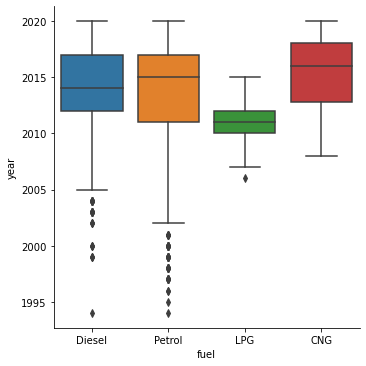

In [52]:
sns.catplot(data=df_1, x='fuel', y='year', kind='box')

Through the years we can see that old cars used to use petrol fuel, then diesel, for a short period of time LPG and nowdays there is CNG fuel competiting with the first two.

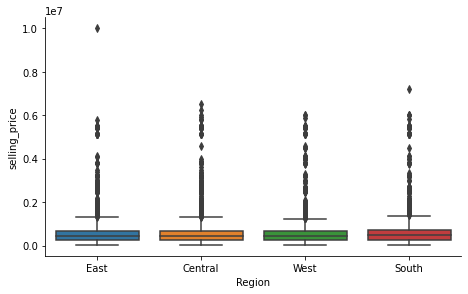

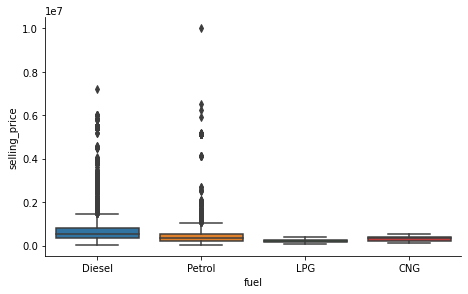

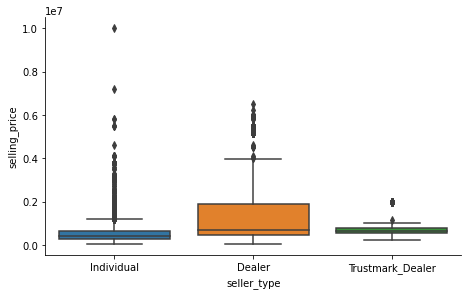

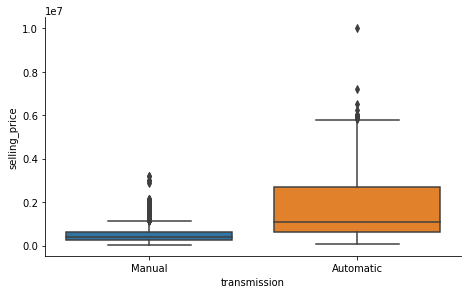

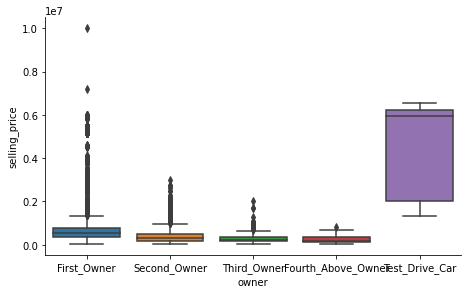

In [66]:
col_categories = ['Region', 'fuel', 'seller_type', 'transmission', 'owner']

for i, col in enumerate(col_categories):
    sns.catplot(data=df_1, x=col, y='selling_price', kind='box', height= 4, aspect=1.6)

'Region': There isn't a differences between the regions and the selling_price.

'fuel': In the case of diesel, petrol we can see there are lot of cars with high prices, and the most exensive car has petrol fuel.

'seller_type': The individual sellers has the most expensive cars, besides the dieler and trustmark_diler.

'transmission': The cars with manual transmission has the least expensive cars, and the mean of the  automatic cars are higher that the first.  And the expensive prices  

'owner': The most exensive are with the first owner, this also could be due to the devaluation of the car through the years.